In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

## Low Trigger Threshold - Abalone at 0 V and SiPM2

In [2]:
data = psu.read_file('/data/abalone/2020_12_15/Abalone0_SiPM2_t15.dat')

/data/abalone/2020_12_15/Abalone0_SiPM2_t15.dat Number of events 359073.0


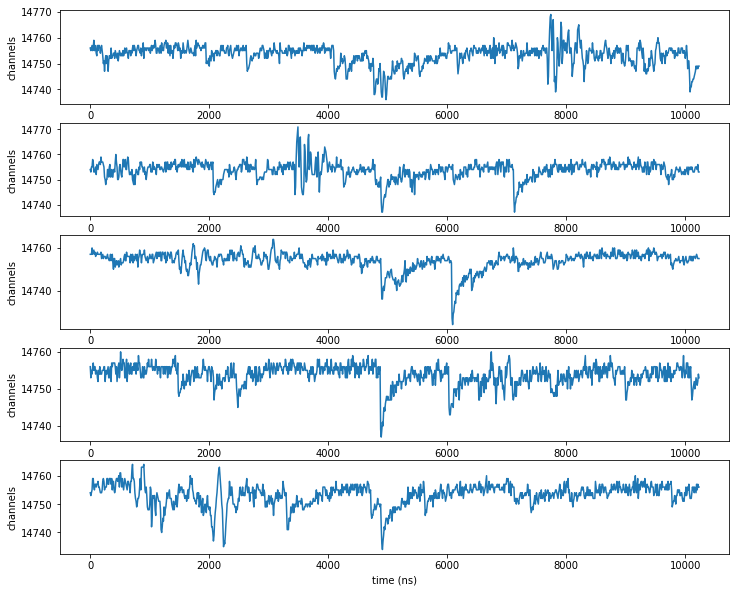

In [3]:
psu.plot_waveforms2( data, events = 5)

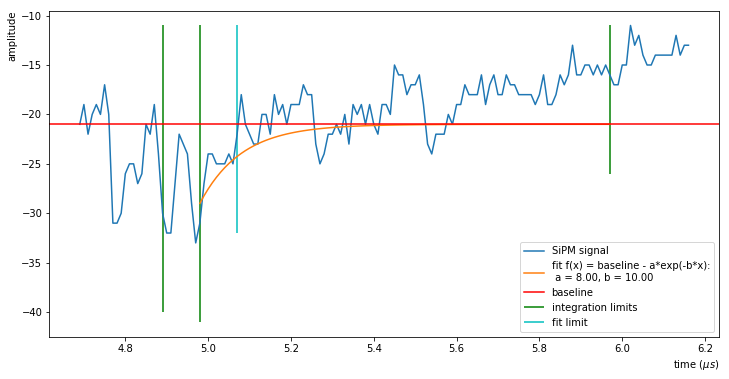

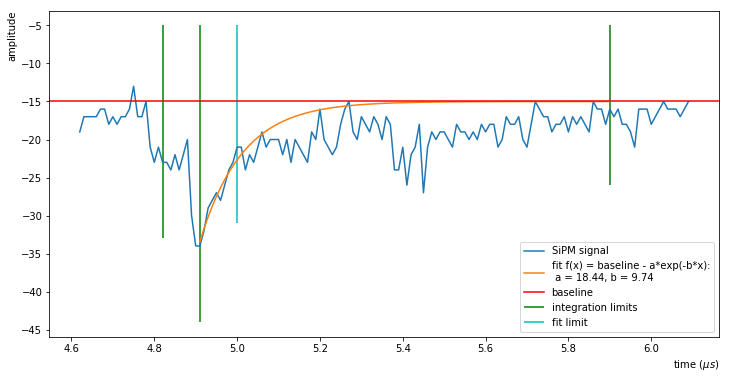

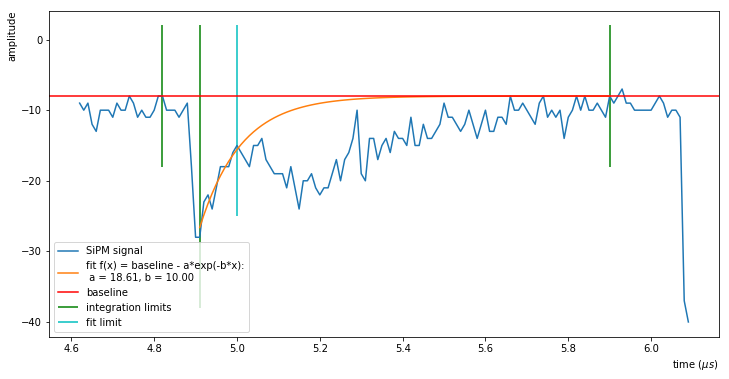

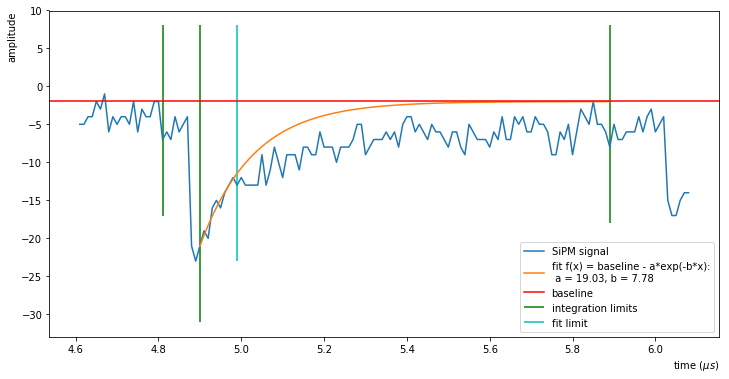

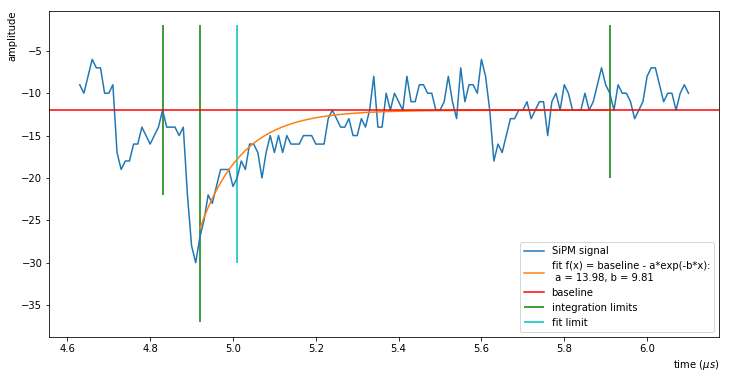

In [17]:
for i in range(5):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data[i], 4, ampllim = 10, plot = False)
    psu.integral_central_peak(data[i],listpeaks, dtl=-8, dtr=1, tfit=10,
                              tlim=100,tc=2,tll=8,tlr=10,plot=True)

In [5]:
def calculate_integrals( data, threshold, npeaks = 0, tfit=10, tlim=100, d_out = 'Abalone0' ):
    nn = len(data)
    peakint = np.zeros(nn)
    t_start = time.time()
    if npeaks == 0: npeaks = nn
    for i in range(npeaks):
        listpeaks = psu.search_peaks(data[i], 4, ampllim = 10, plot = False)
        peakint[i] = psu.integral_central_peak(data[i],listpeaks, dtl=-8, dtr=1, tfit=10,
                                                           tlim=100,tc=2,tll=8,tlr=10,plot=False)
        diff = time.time() - t_start
        if (i % 1000) == 0: print(f'event n. {i} area: {peakint[i]:.2f}, time to process: {diff:.2f}')
    np.save(f'Abalone0/peakint_Abalone0_SiPM2_t{threshold}.npy', peakint)
    return peakint

In [6]:
peakint15 = calculate_integrals( data, threshold = 15, npeaks = 0)

event n. 0 area: 3.33, time to process: 0.01
event n. 1000 area: 2.83, time to process: 4.86
event n. 2000 area: 3.10, time to process: 9.79
event n. 3000 area: 4.63, time to process: 14.66
event n. 4000 area: 3.19, time to process: 19.38
event n. 5000 area: 4.51, time to process: 24.21
event n. 6000 area: 3.15, time to process: 28.91
event n. 7000 area: 3.66, time to process: 33.58
event n. 8000 area: 5.24, time to process: 38.37
event n. 9000 area: 4.37, time to process: 43.26
event n. 10000 area: 3.54, time to process: 48.02
event n. 11000 area: 5.22, time to process: 52.90
event n. 12000 area: 4.63, time to process: 57.71
event n. 13000 area: 7.35, time to process: 62.54
event n. 14000 area: 9.37, time to process: 67.44
event n. 15000 area: nan, time to process: 72.35
event n. 16000 area: 3.11, time to process: 77.17
event n. 17000 area: 3.42, time to process: 81.95
event n. 18000 area: 11.75, time to process: 86.73
event n. 19000 area: 3.99, time to process: 91.61
event n. 20000 a

event n. 173000 area: 3.31, time to process: 836.23
event n. 174000 area: 5.72, time to process: 841.00
event n. 175000 area: 3.04, time to process: 846.03
event n. 176000 area: 2.60, time to process: 850.84
event n. 177000 area: nan, time to process: 855.78
event n. 178000 area: 3.63, time to process: 860.71
event n. 179000 area: 3.33, time to process: 865.63
event n. 180000 area: 9.17, time to process: 870.43
event n. 181000 area: 3.94, time to process: 875.44
event n. 182000 area: 3.67, time to process: 880.33
event n. 183000 area: 4.70, time to process: 885.20
event n. 184000 area: 5.09, time to process: 889.95
event n. 185000 area: 3.70, time to process: 894.81
event n. 186000 area: 3.27, time to process: 899.60
event n. 187000 area: 3.78, time to process: 904.57
event n. 188000 area: 4.52, time to process: 909.52
event n. 189000 area: 3.85, time to process: 914.45
event n. 190000 area: 5.64, time to process: 919.31
event n. 191000 area: nan, time to process: 924.18
event n. 19200

event n. 329000 area: 3.26, time to process: 1592.05
event n. 330000 area: 6.08, time to process: 1596.86
event n. 331000 area: 3.38, time to process: 1601.70
event n. 332000 area: 4.54, time to process: 1606.58
event n. 333000 area: 3.08, time to process: 1611.39
event n. 334000 area: 4.34, time to process: 1616.17
event n. 335000 area: 6.47, time to process: 1620.91
event n. 336000 area: 4.71, time to process: 1625.73
event n. 337000 area: 3.56, time to process: 1630.66
event n. 338000 area: 5.80, time to process: 1635.54
event n. 339000 area: 3.70, time to process: 1640.34
event n. 340000 area: 4.23, time to process: 1645.23
event n. 341000 area: 3.93, time to process: 1650.03
event n. 342000 area: 3.00, time to process: 1654.83
event n. 343000 area: 3.37, time to process: 1659.67
event n. 344000 area: 6.77, time to process: 1664.61
event n. 345000 area: 4.14, time to process: 1669.33
event n. 346000 area: 4.38, time to process: 1674.26
event n. 347000 area: 4.01, time to process: 1

/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 1, 'number of events')

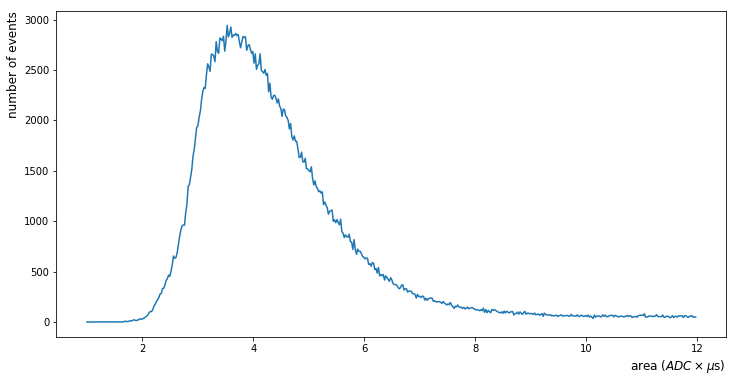

In [7]:
bins = 500
h, t = np.histogram(peakint15, bins=bins, range=(1,12))
#peaks, _ = find_peaks(h, height=hlim, width=5, distance=15)
plt.figure(figsize=(12,6))
plt.plot(t[:bins], h, '-', label = f'Abalone at 0 V with SiPM-2')
#plt.plot(t[peaks], h[peaks], "x")
plt.xlabel(r'area ($ADC\times \mu$s)',ha='right',x=1,fontsize=12)
plt.ylabel('number of events',ha='right',y=1,fontsize=12)

## High Trigger Threshold - Abalone at 0 V and SiPM2

In [8]:
data2 = psu.read_file('/data/abalone/2020_12_15/Abalone0_SiPM2_t40.dat')

/data/abalone/2020_12_15/Abalone0_SiPM2_t40.dat Number of events 351728.0


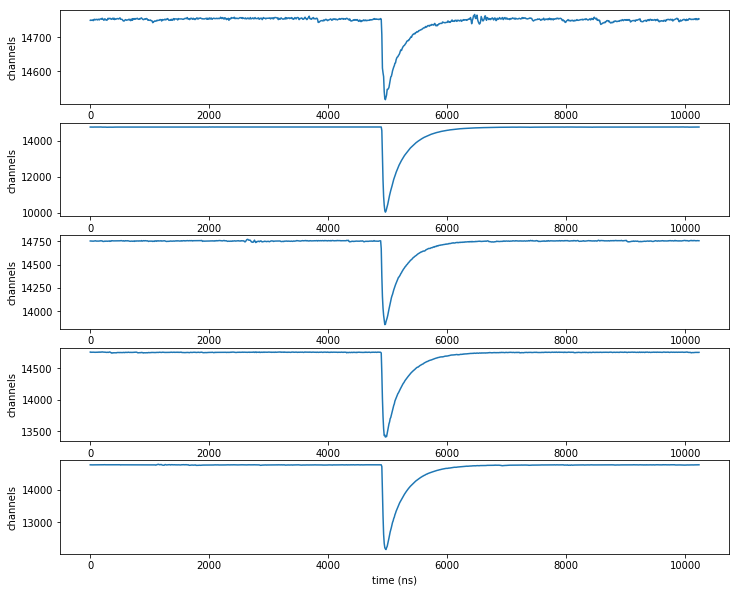

In [9]:
psu.plot_waveforms2( data2, events = 5)

0 area 80.66633697647293
1 area 1619.2345132974526
2 area 308.14510177883244
3 area 484.7691939324339
4 area 909.2379246469665


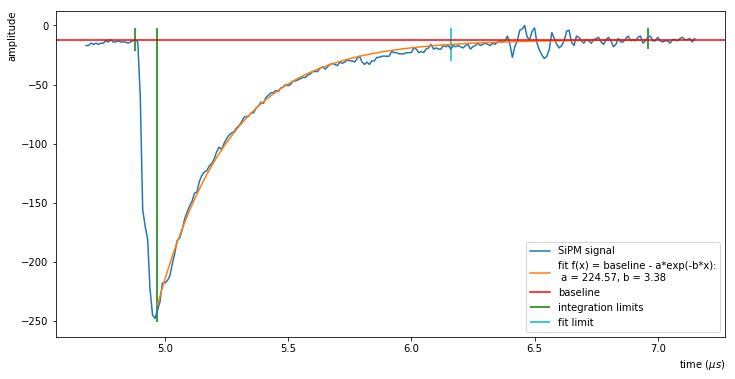

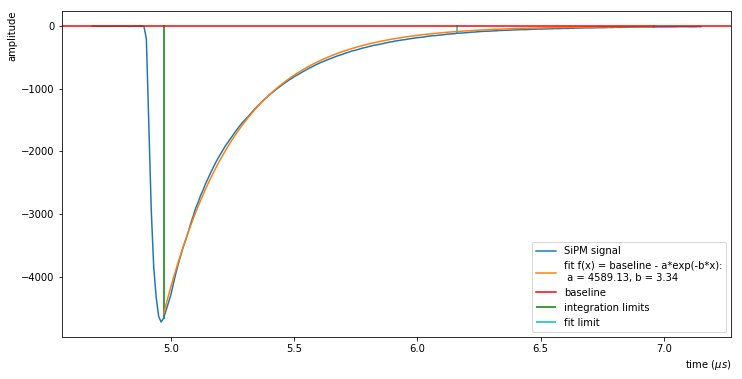

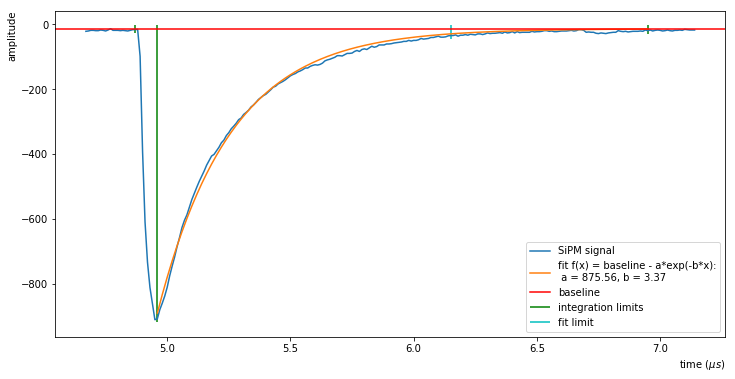

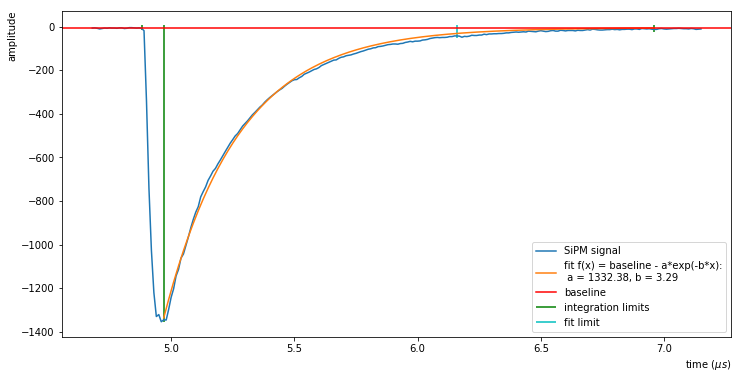

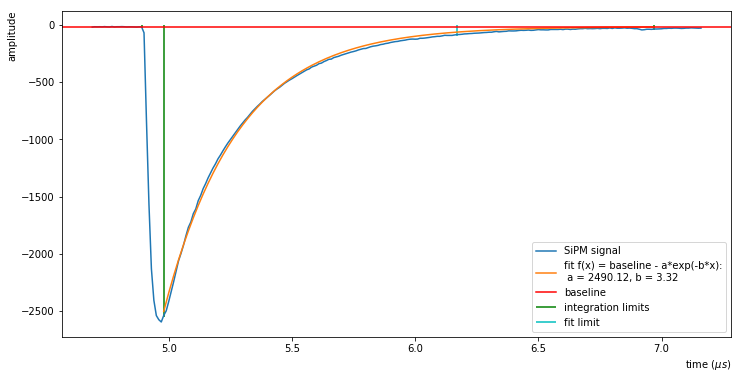

In [10]:
for i in range(5):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data2[i], 4, ampllim = 10, plot = False)
    a = psu.integral_central_peak(data2[i],listpeaks, dtl=-8, dtr=1, tfit=120,
                                  tlim=200,tc=2,tll=8,tlr=10,plot=True)
    print(i,'area',a)

In [11]:
peakint40 = calculate_integrals( data2, threshold = 40, npeaks = 0, tfit=120, tlim=200)

event n. 0 area: 81.17, time to process: 0.01
event n. 1000 area: 99.71, time to process: 4.22
event n. 2000 area: 1017.85, time to process: 8.40
event n. 3000 area: 276.25, time to process: 12.54
event n. 4000 area: 1952.53, time to process: 16.76
event n. 5000 area: 5.41, time to process: 20.98
event n. 6000 area: 761.85, time to process: 25.09
event n. 7000 area: 7.06, time to process: 29.20
event n. 8000 area: 294.56, time to process: 33.37
event n. 9000 area: 591.12, time to process: 37.50
event n. 10000 area: 168.70, time to process: 41.66
event n. 11000 area: 3.58, time to process: 45.80
event n. 12000 area: 7.94, time to process: 49.92
event n. 13000 area: 174.30, time to process: 54.13
event n. 14000 area: 190.15, time to process: 58.25
event n. 15000 area: 588.96, time to process: 62.41
event n. 16000 area: 398.73, time to process: 66.53
event n. 17000 area: 93.43, time to process: 70.68
event n. 18000 area: 320.06, time to process: 74.80
event n. 19000 area: 6.46, time to pr

event n. 156000 area: 418.46, time to process: 650.00
event n. 157000 area: 308.76, time to process: 654.16
event n. 158000 area: 455.04, time to process: 658.31
event n. 159000 area: 6.48, time to process: 662.58
event n. 160000 area: 1166.77, time to process: 666.74
event n. 161000 area: 164.30, time to process: 670.93
event n. 162000 area: 2120.26, time to process: 675.09
event n. 163000 area: 227.97, time to process: 679.22
event n. 164000 area: 3.27, time to process: 683.47
event n. 165000 area: 356.48, time to process: 687.67
event n. 166000 area: 2153.31, time to process: 691.84
event n. 167000 area: 1978.57, time to process: 696.03
event n. 168000 area: 8.11, time to process: 700.22
event n. 169000 area: 833.12, time to process: 704.32
event n. 170000 area: 8.82, time to process: 708.48
event n. 171000 area: 665.16, time to process: 712.62
event n. 172000 area: 507.41, time to process: 716.77
event n. 173000 area: 6.53, time to process: 720.92
event n. 174000 area: 3.24, time t

event n. 308000 area: 1098.73, time to process: 1282.16
event n. 309000 area: 305.13, time to process: 1286.33
event n. 310000 area: 47.12, time to process: 1290.50
event n. 311000 area: 846.62, time to process: 1294.70
event n. 312000 area: 5.89, time to process: 1298.88
event n. 313000 area: 6.86, time to process: 1302.95
event n. 314000 area: 6.88, time to process: 1307.09
event n. 315000 area: 772.46, time to process: 1311.20
event n. 316000 area: 1390.80, time to process: 1315.40
event n. 317000 area: 1157.73, time to process: 1319.52
event n. 318000 area: 1472.63, time to process: 1323.69
event n. 319000 area: 529.83, time to process: 1327.82
event n. 320000 area: 258.34, time to process: 1331.99
event n. 321000 area: 391.30, time to process: 1336.12
event n. 322000 area: 238.87, time to process: 1340.23
event n. 323000 area: 796.13, time to process: 1344.37
event n. 324000 area: 1457.16, time to process: 1348.55
event n. 325000 area: 8.99, time to process: 1352.73
event n. 32600

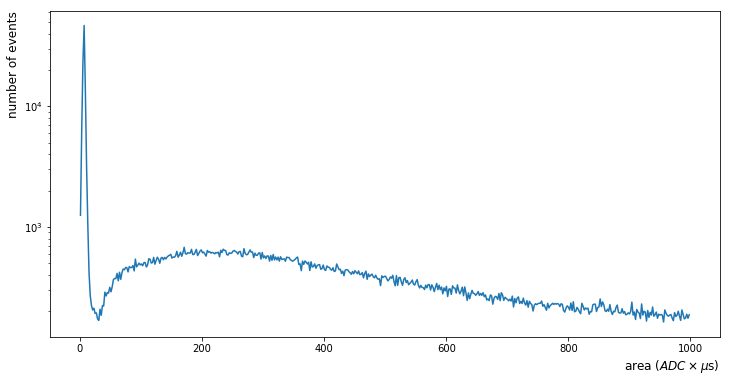

In [18]:
bins = 500
h2, t2 = np.histogram(peakint40, bins=bins, range=(1,1000))
#peaks, _ = find_peaks(h, height=hlim, width=5, distance=15)
plt.figure(figsize=(12,6))
plt.plot(t2[:bins], h2, '-', label = f'Abalone at 0 V with SiPM-2')
#plt.plot(t[peaks], h[peaks], "x")
plt.xlabel(r'area ($ADC\times \mu$s)',ha='right',x=1,fontsize=12)
plt.ylabel('number of events',ha='right',y=1,fontsize=12)
plt.yscale('log')